In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
!wget https://github.com/andrychowanda/COMP6577/raw/master/insurance.csv

--2021-04-01 07:02:00--  https://github.com/andrychowanda/COMP6577/raw/master/insurance.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrychowanda/COMP6577/master/insurance.csv [following]
--2021-04-01 07:02:00--  https://raw.githubusercontent.com/andrychowanda/COMP6577/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37974 (37K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  37.08K  --.-KB/s    in 0.003s  

2021-04-01 07:02:01 (10.8 MB/s) - ‘insurance.csv’ saved [37974/37974]



age : False
sex : False
bmi : False
children : False
smoker : False
region : False
charges : False


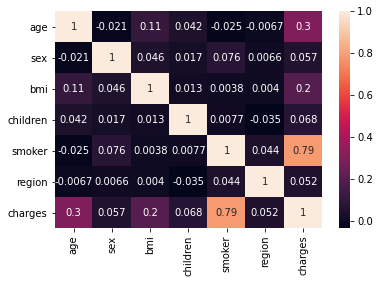

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,2,33.770,1,0,2,1725.55230
2,28,2,33.000,3,0,2,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [11]:
data = pd.read_csv("insurance.csv")
for i in data:
    print(i, ":", data[i].isna().values.any())
corr_matrix = data.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

data

Prepare data for training

In [14]:
X = data[["bmi"]]
Y = data["charges"]
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2)

The BMI feature will be used

In [20]:
print(X)
print(XTrain)
print(XTest)

         bmi
0     27.900
1     33.770
2     33.000
3     22.705
4     28.880
...      ...
1333  30.970
1334  31.920
1335  36.850
1336  25.800
1337  29.070

[1338 rows x 1 columns]
         bmi
32    28.600
805   35.815
218   29.920
751   28.975
486   21.470
...      ...
1007  28.215
23    31.920
1104  29.800
766   32.300
907   32.340

[1070 rows x 1 columns]
         bmi
1310  26.315
696   32.300
821   17.670
104   27.500
1001  32.700
...      ...
1078  31.680
1296  26.125
267   32.395
804   26.510
1138  30.250

[268 rows x 1 columns]


Train Data using Univariate Linear Regression Model

In [43]:
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)
print("theta 0  : ", LRM.intercept_)
print("theta 1  : ", LRM.coef_)
print("R2 Score : ", r2_score(YTest, prediction))
print("Error    : ", mean_squared_error(YTest, prediction))

theta 0  :  2319.065105881289
theta 1  :  [359.42596591]
R2 Score :  0.06544842786231453
Error    :  131566202.77931686


This time we will perform Normalization to BMI feature in a second similar data set.

---



In [23]:
X2 = data[["bmi"]]
Y2 = data["charges"]
X2Train, X2Test, Y2Train, Y2Test = train_test_split(X2,Y2, test_size = 0.2)

Import necessary libraries to perform normalization. Perform Normalization on the BMI feature


In [26]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X2Train)

# transform training data
X_train_norm = norm.transform(X2Train)

# transform testing dataabs
X_test_norm = norm.transform(X2Test)

In [29]:
print(X2)

         bmi
0     27.900
1     33.770
2     33.000
3     22.705
4     28.880
...      ...
1333  30.970
1334  31.920
1335  36.850
1336  25.800
1337  29.070

[1338 rows x 1 columns]


BMI training data after normalization


In [30]:
print(X_train_norm)

[[0.15846112]
 [0.29903148]
 [0.19679849]
 ...
 [0.496099  ]
 [0.39359699]
 [0.47027172]]


BMI test data after normalization

In [49]:
print(X_test_norm)

[[0.36077482]
 [0.51883239]
 [0.32230293]
 [0.49690611]
 [0.49071832]
 [0.51116492]
 [0.31315577]
 [0.47726661]
 [0.26472962]
 [0.26311542]
 [0.55716976]
 [0.08178639]
 [0.63868711]
 [0.18146355]
 [0.3220339 ]
 [0.45574388]
 [0.46731235]
 [0.26836158]
 [0.34503632]
 [0.43449018]
 [0.34893732]
 [0.76029056]
 [0.5929513 ]
 [0.44982513]
 [0.42682271]
 [0.19504977]
 [0.18146355]
 [0.28880818]
 [0.47027172]
 [0.21899381]
 [0.31692225]
 [0.50686037]
 [0.34759214]
 [0.17863869]
 [0.53241862]
 [0.44767285]
 [0.39104116]
 [0.40812483]
 [0.63599677]
 [0.4881625 ]
 [0.55609362]
 [0.39359699]
 [0.1865752 ]
 [0.2811407 ]
 [0.64191552]
 [0.30777509]
 [0.11218725]
 [0.23769169]
 [0.18913102]
 [0.12483185]
 [0.37315039]
 [0.3134248 ]
 [0.36803874]
 [0.55972559]
 [0.85499058]
 [0.50686037]
 [0.26203928]
 [0.53416734]
 [0.05111649]
 [0.27091741]
 [0.3322572 ]
 [0.31692225]
 [0.46112456]
 [0.39359699]
 [0.47619048]
 [0.32458972]
 [0.42682271]
 [0.32230293]
 [0.45238095]
 [0.496099  ]
 [0.43422115]
 [0.31

Univariate Linear Regression Model after Normalization

In [50]:
LRM2 = LinearRegression().fit(X_train_norm, Y2Train)
prediction2 = LRM2.predict(X_test_norm)
print("theta 0  : ", LRM2.intercept_)
print("theta 1  : ", LRM2.coef_)
print("R2 Score : ", r2_score(Y2Test, prediction2))
print("Error    : ", mean_squared_error(Y2Test, prediction2))

theta 0  :  7517.253265307731
theta 1  :  [14175.84549961]
R2 Score :  0.043406880135615
Error    :  138764554.83363062


Univariate Linear Regression Model before Normalization

In [51]:
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)
print("theta 0  : ", LRM.intercept_)
print("theta 1  : ", LRM.coef_)
print("R2 Score : ", r2_score(YTest, prediction))
print("Error    : ", mean_squared_error(YTest, prediction))

theta 0  :  2319.065105881289
theta 1  :  [359.42596591]
R2 Score :  0.06544842786231453
Error    :  131566202.77931686


After applying Normalization to the BMI feature, the y-intercept is now smaller, the gradient is steeper now, regression score has gotten worse and the mean_squared_error has gotten larger. In conclusion, Normalization has actually made the model worse and made a significant difference. 